In [4]:
import os
import torch
import torchvision
import random
import matplotlib.pyplot as plt
from torchvision.models import resnet50

In [5]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

# Define el modelo con la misma arquitectura que usaste para entrenar
model = resnet50(pretrained=False, num_classes=6)  # Ajusta 'num_classes' según tu configuración

# Especifica la ruta donde guardaste el modelo entrenado
models_path = os.path.join('..', 'models')

# Carga los parámetros entrenados en el modelo
model = torch.load(os.path.join(models_path, 'ResNet50.pt')).to(device)
model.eval()  # Cambia el modo del modelo a evaluación

c:\Users\quiqu\miniconda3\envs\pic\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\quiqu\miniconda3\envs\pic\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [6]:
# Define la transformación para las imágenes
transf = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224,224)),
    torchvision.transforms.ToTensor(),
])

# Learning rate
lr=0.001

# Número de epochs de entrenamiento
num_epochs = 5

# Batch size
batch_size = 32

data_test_path = os.path.join('..','dataset-test')
dataset_test = torchvision.datasets.ImageFolder(root=data_test_path, transform=transf)
test_dataloader = torch.utils.data.DataLoader(dataset_test, batch_size, shuffle=False, num_workers=2)

labels = dataset_test.classes
print(f'Clases {labels}')
num_classes = len(labels)

Clases ['cardboard', 'glass', 'metal', 'paper', 'plastic']


Predicción: cardboard
Real: glass


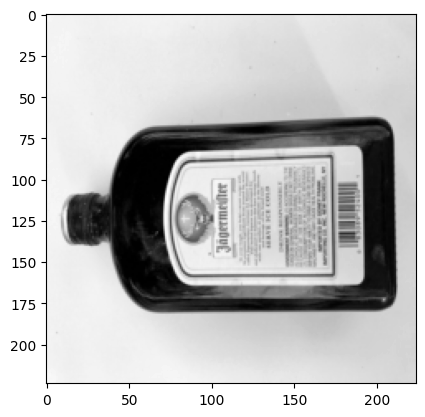

In [15]:
# Visualización de resultados
x, y = next(iter(test_dataloader))
y_pred = model(x.to(device))

# Probamos con una imagen aleatoria del dataset de test
i = random.randint(0, len(x)-1)
plt.imshow(x[i, 0], cmap='gray');
print('Predicción: {}'.format(labels[y_pred.argmax(dim=1)[i]]))
print('Real: {}'.format(labels[y[i]]))

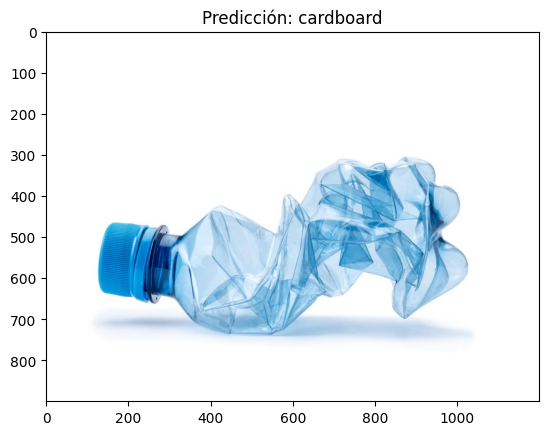

In [11]:
img_color_path = os.path.join('..', 'clase', 'prueb.jpg')
img_color = torchvision.io.read_image(img_color_path).permute(1, 2, 0)

true_label = labels[y[i]]

# Obtenemos la predicción del modelo para la imagen seleccionada
with torch.no_grad():
    model.eval()
    y_pred = model(x[i].unsqueeze(0).to(device))

# Obtenemos la etiqueta predicha por el modelo
predicted_label = labels[y_pred.argmax(dim=1).item()]

# Mostramos la imagen con Matplotlib
plt.imshow(img_color)
plt.title(f'Predicción: {predicted_label}')
plt.show()